# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

Import the core data science libraries:

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [52]:
# Importing the data train
df = pd.read_csv('./data/Train.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

**Below will display five sample rows from my data set**


In [48]:
df.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
5216,5217,A,Flight,6,2.0,293,5,low,M,2,1494,0
9799,9800,F,Ship,4,2.0,170,2,low,M,3,4299,0
5481,5482,B,Flight,3,5.0,162,3,medium,M,1,4480,0
3660,3661,D,Ship,5,3.0,249,2,medium,M,3,4440,0
3897,3898,B,Ship,4,4.0,207,3,low,M,9,4314,0


**Below is a list off all the column names and its data types**

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10998 non-null  object 
 3   Customer_care_calls  10998 non-null  float64
 4   Customer_rating      10996 non-null  float64
 5   Cost_of_the_Product  10998 non-null  float64
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10995 non-null  object 
 8   Gender               10998 non-null  object 
 9   Discount_offered     10997 non-null  float64
 10  Weight_in_gms        10999 non-null  int64  
 11  Reached.on.Time_Y.N  10998 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.0+ MB


***One interesting aspect of my data set is the customer care calls, which is the number of inquiry calls made about the shipment.***

In [54]:
df['Customer_care_calls']

0        4.0
1        4.0
2        2.0
3        3.0
4        2.0
        ... 
10994    4.0
10995    4.0
10996    5.0
10997    5.0
10998    2.0
Name: Customer_care_calls, Length: 10999, dtype: float64

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

The code below creates a new data frame of all of the rows that have missing values. df.isnull().any() searches all the columns that have NaN values.

In [56]:
bad_rows = df[ df.isnull().any(axis=1) ]
bad_rows.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4.0,NaN,177.0,3,low,F,44.0,1233,1.0
9,10,B,NaN,3.0,2.0,164.0,3,medium,F,29.0,1187,1.0
20,21,A,Ship,3.0,NaN,161.0,2,medium,F,38.0,1521,1.0
23,24,F,Ship,4.0,3.0,211.0,3,NaN,M,12.0,3922,1.0
43,44,F,Ship,3.0,1.0,174.0,2,low,M,NaN,1556,1.0


I will now drop all the rows with missing values using the code beowl. 

In [60]:
df = df.dropna()

bad_rows = df[ df.isnull().any(axis=1) ]
bad_rows.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


I ran the code again to show any rows with missing values. The result shows that there is no rows with missing values. Therefore we have successfully cleaned the data set. 

## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

#### Stat 1: Generating basic statistics of a subset of the data set i.e weight_in_gms

In [8]:
df['Weight_in_gms'].describe()

count    10999.000000
mean      3634.016729
std       1635.377251
min       1001.000000
25%       1839.500000
50%       4149.000000
75%       5050.000000
max       7846.000000
Name: Weight_in_gms, dtype: float64

#### Stat 2: Counting the values

The code is counting the accurances of each of the values in the X column. It returns a 2d list with the values of the left and the count on the right. 

***Customer_rating: the data shows that 3/5 rating is the most frequent with 2239 count and 2/5 is the least frequent with 2165 count***

In [9]:
df['Customer_rating'].value_counts()

3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64

***Customer_care_calls: the data below shows that the most frequent number of customer care calls is 4 with 3557 and the lowest frequency is 7 with 246.***

In [10]:
df['Customer_care_calls'].value_counts()

4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64

***Prior_purchases: the data below shows that 3 prior purchases is the most frequent with 3955 count and 8 prior purchases is the least frequent with 128 count.***

In [11]:
df['Prior_purchases'].value_counts()

3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64

#### Stat 3: Grouping mode_of_shipment with mean customer_ratings and reached_on_time

The groupby operation involves some combination of splitting the object, applying a function, and combining the results. 

Firstly going to count how many packages were delivered via each mode. 

In [12]:
df.groupby("Mode_of_Shipment")['Mode_of_Shipment'].count().sort_values(ascending=False)

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

Below shows that the mean customer ratings is about the same for each mode of transport which is quite interesting because you might has assumed that one mode would have better or worse reseults than the others. 

In [13]:
df.groupby("Mode_of_Shipment")['Customer_rating'].mean().sort_values(ascending=False)

Mode_of_Shipment
Road      2.995455
Ship      2.991289
Flight    2.982555
Name: Customer_rating, dtype: float64

Below shows the grouping with the column reached_one_time which we will take the mean of. The data shows that the mode of shipment that reached the customer on time on average was flight, however the gap between other modes of transport is very small therefore we can assume that the difference is negligible. 

In [14]:
df.groupby("Mode_of_Shipment")['Reached.on.Time_Y.N'].mean().sort_values(ascending=False)

Mode_of_Shipment
Flight    0.601576
Ship      0.597561
Road      0.588068
Name: Reached.on.Time_Y.N, dtype: float64

#### Stat 4: Grouping gender with mean of cost_of_product, discount_offered and prior_purchases.

Below shows the grouping of gender with the mean cost_of_product. The data shows that the mean cost_of_product by males is greater than females; however, the difference is too small to consider significant. 

In [15]:
df.groupby("Gender")['Cost_of_the_Product'].mean().sort_values(ascending=False)

Gender
M    211.154382
F    209.255005
Name: Cost_of_the_Product, dtype: float64

Below shows the grouping of gender with discount offered. The data shows that the mean of the discount offered is greater for females than males; however, again the difference is too small to consider significant. 

In [16]:
df.groupby("Gender")['Discount_offered'].mean().sort_values(ascending=False)

Gender
F    13.562489
M    13.180785
Name: Discount_offered, dtype: float64

Below shows the grouping of gender with prior purchases. The data shows that the mean of the prior purchases is greater for females than males; however, again the difference is too small to consider significant. 

In [17]:
df.groupby("Gender")['Prior_purchases'].mean().sort_values(ascending=False)

Gender
F    3.581785
M    3.553172
Name: Prior_purchases, dtype: float64

#### Stat 5: Grouping Warehouse_block to mean of customer_care_calls, reached_on_time, weaight_in_grams and cost_of_product

Below shows the grouping of warehouse_block with customer_care_calls. The data shows that the mean customer_care_calls is nearly the same for all warehouse blocks. 

In [18]:
df.groupby("Warehouse_block")['Customer_care_calls'].mean().sort_values(ascending=False)

Warehouse_block
F    4.075014
C    4.064921
D    4.053435
A    4.038189
B    4.020185
Name: Customer_care_calls, dtype: float64

Below shows the grouping of warehouse_block with reached_on_time column. The data shows that the mean reached_on_time is the highest for block B and lowest for block A; however, the difference is not significant to make any claims. 

In [19]:
df.groupby("Warehouse_block")['Reached.on.Time_Y.N'].mean().sort_values(ascending=False)

Warehouse_block
B    0.602291
F    0.598472
D    0.597601
C    0.596836
A    0.586470
Name: Reached.on.Time_Y.N, dtype: float64

Below shows the grouping of warehouse_block with weight of the product in grams. The data shows that the mean weight of the product is highest for block F and lowest for block A. 

In [20]:
df.groupby("Warehouse_block")['Weight_in_gms'].mean().sort_values(ascending=False)

Warehouse_block
F    3641.387616
C    3641.331151
B    3635.701037
D    3628.846783
A    3615.448991
Name: Weight_in_gms, dtype: float64

Below shows the grouping of warehouse_block with cost_of_product The data shows that the mean cost_of_product is the highest for block B and the lowest for block A. 

In [21]:
df.groupby("Warehouse_block")['Cost_of_the_Product'].mean().sort_values(ascending=False)

Warehouse_block
B    212.159302
C    211.191489
D    210.907852
F    209.077196
A    208.767594
Name: Cost_of_the_Product, dtype: float64

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

#### Visual 1: Bar charts

First I need to create series of just the warehouse block and the count for each block. Then I will call the matplotlib moudule to generate the bar graph. I added additional labels for the graph. I repeat this process for all the subsequent bar graphs.

***Warehouse_Block***

Text(0.5, 0, 'Warehouse Block')

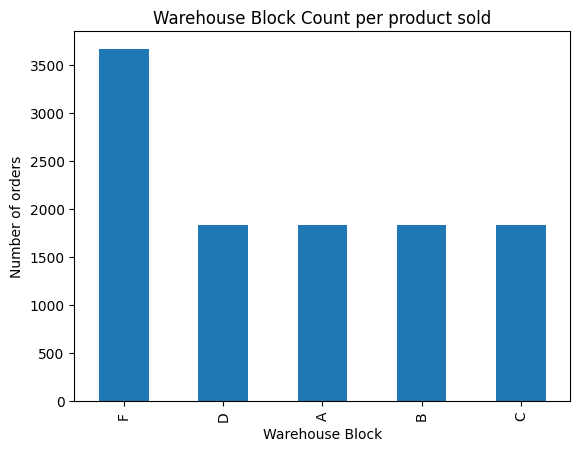

In [22]:
g = df['Warehouse_block'].value_counts()
g.plot.bar()
plt.title('Warehouse Block Count per product sold')
plt.ylabel('Number of orders')
plt.xlabel('Warehouse Block')

***Mode_of_Shipment***

Text(0.5, 0, 'Shipment/Transport Types')

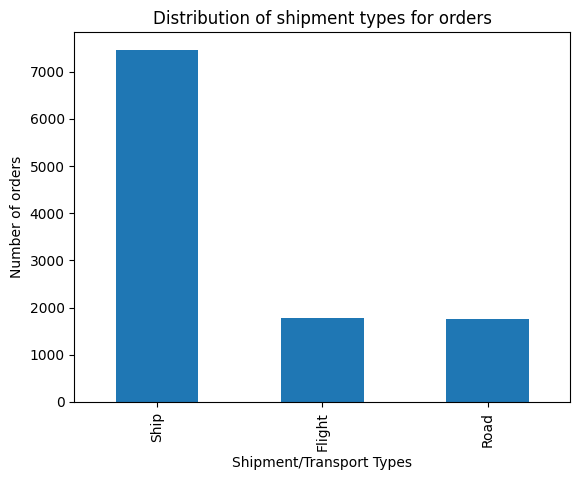

In [23]:
w = df['Mode_of_Shipment'].value_counts()
w.plot.bar()
plt.title('Distribution of shipment types for orders')
plt.ylabel('Number of orders')
plt.xlabel('Shipment/Transport Types')

***Product_importance***

Text(0.5, 0, 'Level of Importance ')

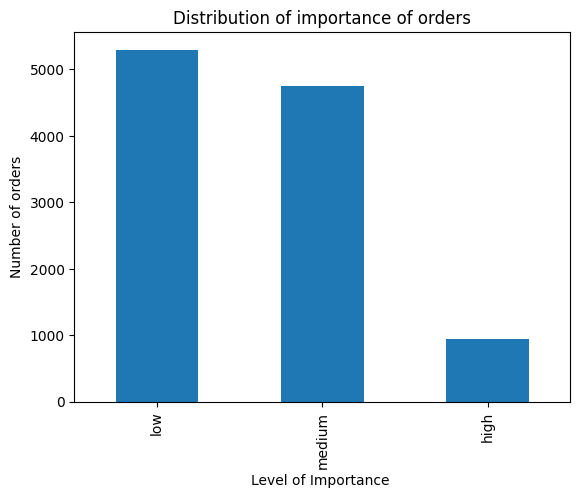

In [24]:
e = df['Product_importance'].value_counts()
e.plot.bar()
plt.title('Distribution of importance of orders')
plt.ylabel('Number of orders')
plt.xlabel('Level of Importance ')

#### Visual 2: Scatter Plot

***Cost of product and Discount Offered***

First I will create a series of the x and y axis, which will be lists. Then I will apply the scatter() functions will generate the scatter plot.

Text(0.5, 0, 'Cost of Product')

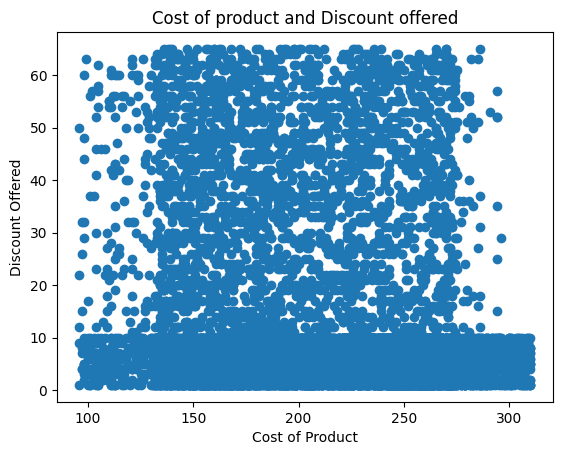

In [25]:
#x-axis will be the cost of the product
x = df['Cost_of_the_Product']
#y-axis will be the discount offered on the product
y = df['Discount_offered']
plt.scatter(x,y)
plt.title('Cost of product and Discount offered')
plt.ylabel('Discount Offered')
plt.xlabel('Cost of Product')

From the scatter graph above we can see that there isn't any relationship between cost of product and dicount offered. However, intuitively we would believe that the higher the cost the more discount you would get. 

***Relationship between Cost of product and Weight of the product***

First I will create a series of the x and y axis, which will be lists.

(10999,)
(10999,)


Text(0, 0.5, 'Cost of Product')

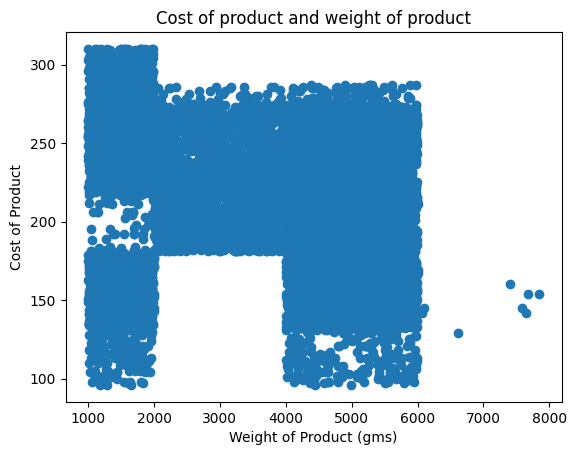

In [26]:
#y-axis will be the cost of the product
y = df['Cost_of_the_Product']

#x-axis will be the weight of the product
x = df['Weight_in_gms']

plt.scatter(x,y)
plt.title('Cost of product and weight of product')
plt.xlabel('Weight of Product (gms)')
plt.ylabel('Cost of Product')

Again there seems to be no relationship between Weight and cost of the product.

#### Visual 3: Pie Chart

***Warehouse Blocks Distribution***

First I created a seperate dataframe for Warehouse_block and count for each block. I then used the matplotlib method to generate the pie chart.

<AxesSubplot:ylabel='Warehouse_block'>

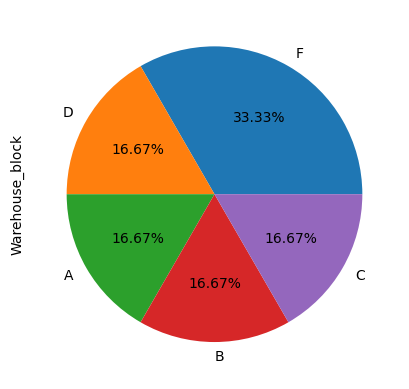

In [27]:
g = df['Warehouse_block'].value_counts()
g.plot.pie(autopct='%1.2f%%')

The distribution of the pie chart shows that Warehouse block F fulfills more than double of any block. 

***Customer Ratings Distribution***

I used the same process as above.

<AxesSubplot:ylabel='Customer_rating'>

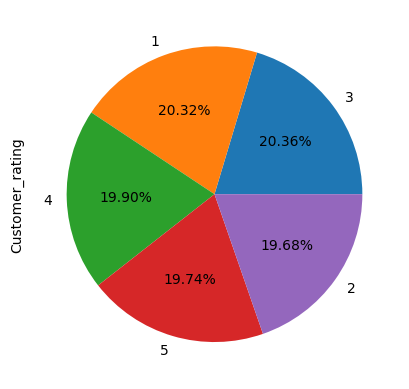

In [28]:
g = df['Customer_rating'].value_counts()
g.plot.pie(autopct='%1.2f%%')

The distribution looks nearly equal; however, frequency of 1 & 3 is higher than the rest. 

#### Visual 4: Area Chart

***Product Importance***

I will first create a dataframe of the importance and count, respectively. I then call the area() to generate the area graph.

<AxesSubplot:>

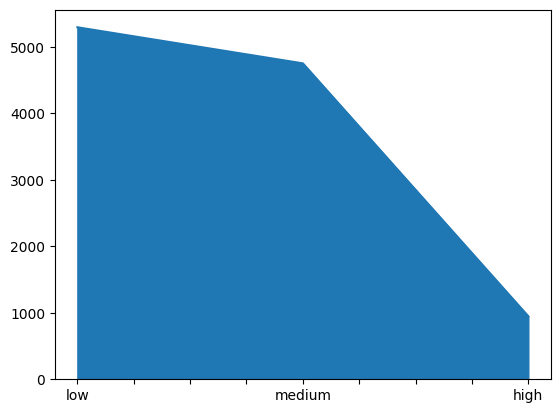

In [30]:
w = df['Product_importance'].value_counts()
w.plot.area()

Our area graph shows that majority of the products are categorized as low importance.

***Mode of Shipment***

I used the same process as above.

<AxesSubplot:>

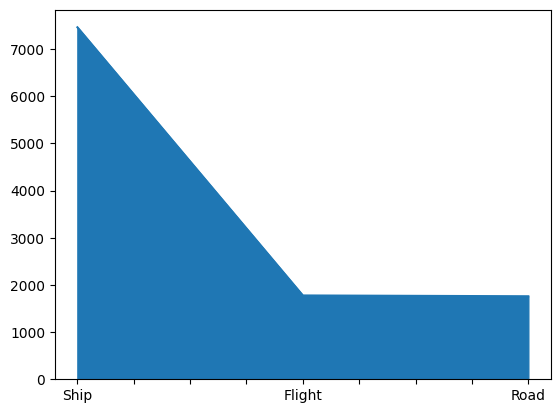

In [31]:
t = df['Mode_of_Shipment'].value_counts()
t.plot.area()

Our area chart shows that products are delivered via ship the most compared to any other modes of delivery.

#### Visual 5: Box Plot

***Cost of Product***

First I created a seperate datafram for the cost of products. I then used the matplotlib method to generate the box plot. 

Text(0.5, 0, 'Cost of Product')

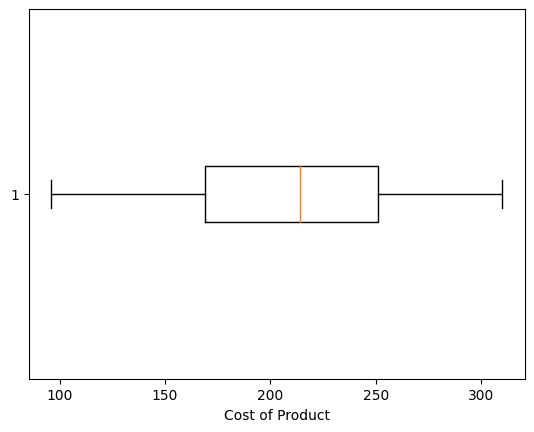

In [32]:
f = df['Cost_of_the_Product']
plt.boxplot(f, vert=False)
plt.xlabel('Cost of Product')

***Weight of Product***

I used the same process as above.

Text(0.5, 0, 'Cost of Product')

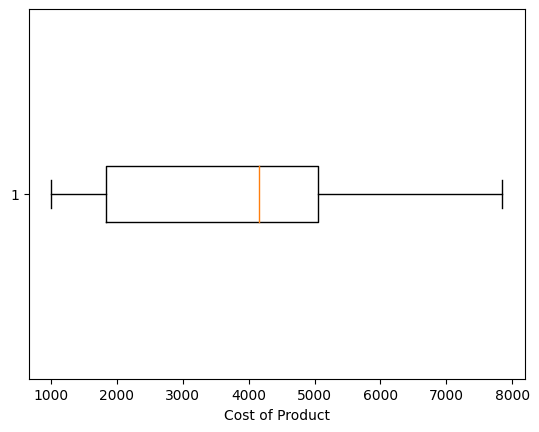

In [33]:
j = df['Weight_in_gms']
plt.boxplot(j, vert=False)
plt.xlabel('Cost of Product')